## Description of the variables - Data dictionary for Bank Churn Dataset
The dataset that gives information about 10000 customers and their banking activity. 
The dataset is a structured cvs.file, so methods for supervised ML Learning will need to be used, in addition to that you can see that 14 attributes are included in the dataset, which will be described more in detail.
The goal is to predict if a customer will stay in the bank or churn, based on the 14 features. The bank and the stakeholders can identify high-risk customers in an early stage and can implement strategies that target the high-risk customers to prevent them from churn

In [38]:
#used libaries 
import random  
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt #used for visualization
import seaborn as sns #used for visualizatuion 
from sklearn.model_selection import train_test_split # used to split dataset into Training- and Testset
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # used to evalute the performance of the model 
from sklearn.model_selection import cross_val_score

In [67]:
df = pd.read_csv(r"C:\Users\monaa\Desktop\ProjektAlisa\Bank_Churn_Data.csv") #path to read my file - raw string opens the file without mistakes
df.head() # shows the first rows of the dataset to inspect it further 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Customer Information
- RowNumber: integer, index of the customers
- CustomerId: integer, not predictive, is unique because it is assigned to each customer and has no further information
- Surname: string, last name of the customer, not needed for possible predicitions
- Gender: binary, shows the gender of a customer
- Age: integer in years, shows the age of the customer
- Geography: string, shows where the customer is living 
### Account Informations and Financial Information
- CreditScore: integer, shows how creditworthy a customer is
- Tenure: integer, shows the number of years that a customer has been with the bank 
- Balance: float due to monetary value, shows the customers bank account balance, customers with zero balance could mean that the customer is inactive 
- NumOfProducts: integer, number of financial products that a customer uses 
- HasCrCard: binary, shows if the customer has a credit card or not 
- IsActiveMember: binary, shows if a customer is using the bank services activly or not 
- EstimatedSalary: float due to monetary value, estimated income of the customer
### Target Variable 
- Exited: binary, shows if a customer has left the bank or not, 0 = customer is staying in the bank, 1 means the customer is leaving the bank

In [3]:
df.info() # get more detailled information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum() # check if the data has any missing values 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There no missing values in the dataset.

In [5]:
df[df.duplicated()] # check if there are any duplicates in the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


There are no duplicates in the data.

In [6]:
df.describe() #to get the statistical data of the dataset 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Interpretation of the statistic values of the dataset 

The dataset has 10.000 rows which suggets as it showed before that there are no missing or double values.

Mean:
- the mean age of the customers is 39 approximatly 39 years old 
- the mean of the creditscore is approximatly 650 which shows that the credit score is rather in the middle 
- the mean of the number of products that a customer has is approximatly two, which shows that there is not a lot of cross selling 
- about 70% of the customers have a credit card
- about 50% are actually active members

std - standard deviation: 
- the estimated salary shows a high std with 57,510 which suggegst that there is a large distribution in the salary of the customers
- the balance shows also a high std with 62,397 which shows that the customers have a very different account balances 
- the credit score has a std of 96,65 which indicates some dispersion in the creditworthness of the customers 

- minimum and maximum values 
- the youngest customer is 18 years old, while the oldest customer is 92 years old 
- the balance shows 0 that could mean that some customers have no balance in their account 
- the maximum number of products that a customer of the bank uses is 4 
- the highest salary is approximatly 199992 that a customer of the bank has 

- Quartile values - 25, 50, 75:
- 25% of the customers have a credit score of 584 which shows that they have a lower creditworthness
- 25% of the customers have a balance of 0 which means that a quarter of the customers have no balance in their account
- 25% of the customers earn less than 51002 
- 50% of the customers have a credit score that is 652 or lower
- 50% of the customers earn less than approximatly 100194 
- 75% of the customers in the bank have a balance of 127644 or less which means that a 25 of the customers have higher balances 

- Exited - Churn Rate:
- the mean for the exited column is 0.2037, which means that approximatly 20,37% of the customers of the bank have churned.

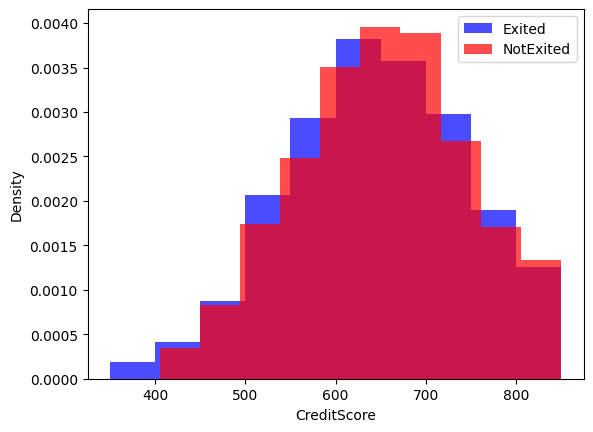

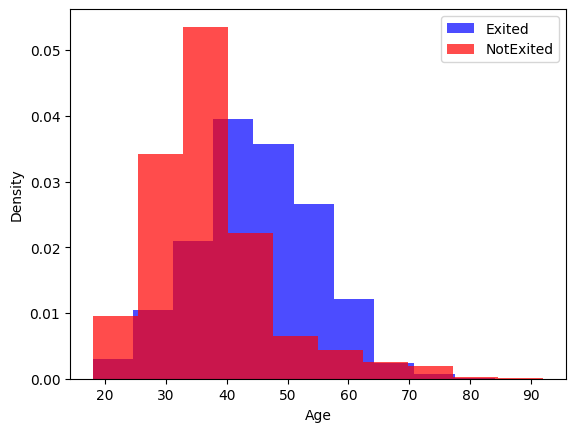

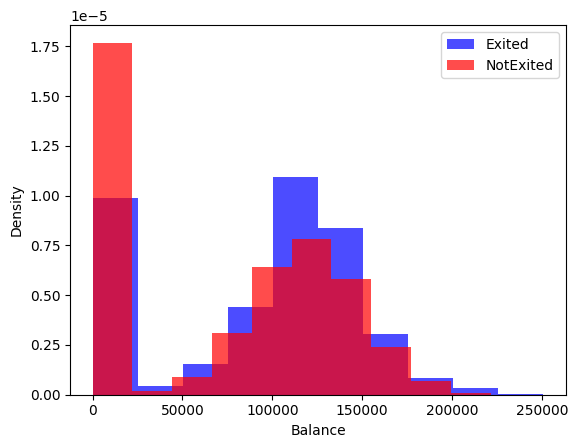

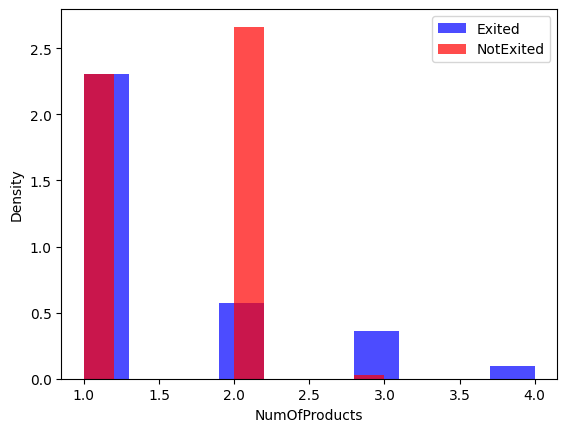

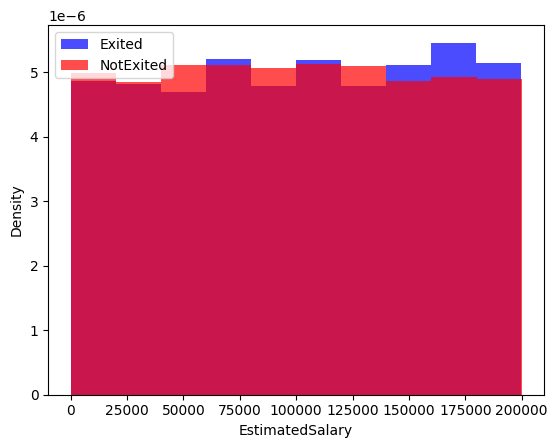

In [7]:
cols = ["CreditScore", "Age", "Balance", "NumOfProducts", "EstimatedSalary"] #columns that are used for visualisation without exited because it is the target variable
for col in cols: #creates a histogramm for every column that is mentioned in the row before 
    plt.hist(df[df["Exited"] == 1][col], color='blue', label='Exited', alpha=0.7, density=True) #creates histogramms about the customers who churned 
    
    plt.hist(df[df["Exited"] == 0][col], color = 'red', label= 'NotExited', alpha=0.7, density=True) # creates histogramms about the customers who did not churn
    plt.xlabel(col) #name of the column as x-axis label 
    plt.ylabel("Density") #normalized frequency
    plt.legend() #shows the labels 
    plt.show() #shows the chart

### Interpretation: Credit Score Distribution

- The distribution of credit scores is nearly identical for both churned (Exited) and retained (NotExited) customers.
- This indicates that Credit Score may not be a strong predictor of churn in this dataset. Both classes have a similar normal-like distribution centered around 650.

### Interpretation: Age Distribution

There is a clear difference in age distribution between the two groups:
- Most NotExited customers are younger (around 30–40 years).
- Most Exited customers are older, peaking between 40 and 60 years.
This suggests that age is a relevant factor in customer churn — older customers are more likely to leave.

### Interpretation: Account Balance Distribution

- Exited customers show a much higher density for **medium-to-high balances** (especially around 100,000–150,000), while NotExited customers are more likely to have a zero or low balance.
This suggests that customers with significant money in their accounts might leave if they are not satisfied, indicating that balance may be a risk factor.

### Interpretation: Number of Products

- Customers with two products are mostly retained NotExited, while customers with three or more products show a notable increase in churn.
This may indicate dissatisfaction among multi-product users, or that upselling does not guarantee retention. Customers with only one product are distributed across both groups.

### Interpretation: Estimated Salary Distribution

- There is no clear difference in salary distribution between churned and retained customers.
This suggests that salary alone is not a useful predictor for churn in this dataset, and should likely be combined with other features (e.g., Age, Balance) for meaningful insights.


In [40]:
df = pd.read_csv("Bank_Churn_Data.csv") 
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # 'Male' → 1, 'Female' → 0

# transform the column 'Geography' with One-Hot-Encoding so that these kategorical values are numerical values and can be used for machine learning 
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [41]:
df.head() #inspect the dataframe after the transformation

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [ ]:
# Feature Definition and Target Variable Selection
features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain'] #choosing features for my ml-model
X = df[features] 
y =df['Exited'] #targetvariable 

In [ ]:
#spliting dataset into training and test-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#feature scaling before training 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
# Standardization of Feature Values Before Model Training
X_train[:5], X_test[:5] #show the transformed dataset 

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57946723,
         -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 ,  1.72572313,
         -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688, -0.57946723,
          1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272, -0.57946723,
         -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019, -0.57946723,
         -0.57638802]]),
 array([[-0.57749609,  0.91324755, -0.6557859 , -0.69539349,  0.32993735,
          0.80843615, -1.54035103, -1.02583358, -1.01960511,  1.72572

In [74]:
# Mapping Feature Correlation After Preprocessing

import pandas as pd

# If X_train is a NumPy array, get feature names from the preprocessed DataFrame
df_processed = df.drop(columns=["Exited"])  # Ensure this matches the processed dataset

# Ensure the number of features matches
if X_train.shape[1] == df_processed.shape[1]:  
    feature_names = df_processed.columns.tolist()  # Extract only the remaining columns
else:
    print(f"Warning: X_train has {X_train.shape[1]} features, but found {df_processed.shape[1]} feature names.")
    feature_names = df_processed.columns[: X_train.shape[1]].tolist()  # Adjust if needed

# Convert NumPy array (X_train) to Pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Compute correlation matrix
correlation_matrix = X_train_df.corr()
print(correlation_matrix)

               RowNumber  CustomerId   Surname  CreditScore  Geography  \
RowNumber       1.000000   -0.003459 -0.007253    -0.007670   0.006758   
CustomerId     -0.003459    1.000000 -0.028496     0.013163   0.010937   
Surname        -0.007253   -0.028496  1.000000    -0.008788   0.027782   
CreditScore    -0.007670    0.013163 -0.008788     1.000000  -0.011748   
Geography       0.006758    0.010937  0.027782    -0.011748   1.000000   
Gender          0.019402   -0.019426 -0.033875     0.018448  -0.297601   
Age            -0.013145    0.004031 -0.020440     0.020439  -0.015655   
Tenure          0.028217    0.020282  0.088123    -0.023162  -0.022086   
Balance        -0.002628   -0.016708 -0.000997     0.022071   0.011984   
NumOfProducts   0.003082   -0.018806  0.042562    -0.002179   0.407698   
HasCrCard       0.007766    0.019859  0.000851     0.003336  -0.140053   

                 Gender       Age    Tenure   Balance  NumOfProducts  \
RowNumber      0.019402 -0.013145  0.02

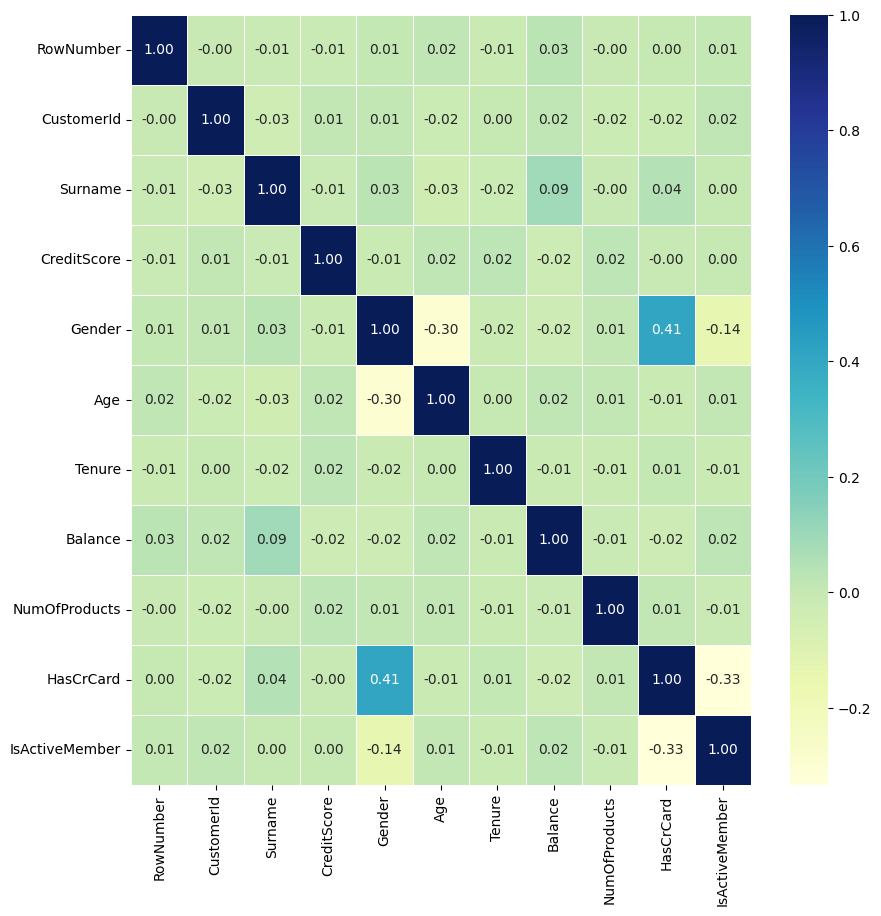

In [15]:
# Convert X_train to a Pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=feature_names)  # Ensure feature_names is defined

# Compute correlation matrix
corr_matrix = X_train_df.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu", ax=ax)
plt.show()

### Interpretation of the Correlation Matrix
The correlation matrix represents the pairwise linear relationships between numerical characteristics of the dataset. The values ​​range from -1 (perfect negative correlation) to +1 (perfect positive correlation). Values ​​close to 0 indicate no linear relationship.

Obervations and Interpretations:
surname, customerID, RowNumer
- They do not contribute any useful information for modeling and should be removed.

- Gender vs. Age: Correlation ≈ -0.30. A moderate negative correlation: Men and women differ in age in this dataset. This could indicate sociodemographic structures in the customer base.

- HasCrCard vs. IsActiveMember: Correlation ≈ -0.33. Customers with credit cards tend to be slightly less active members. This could indicate customers who own products but show less interaction.

- Gender vs. HasCrCard: Correlation ≈ 0.41

- Men and women also differ in terms of credit card ownership. There may be gender-specific product preferences here.

- Other variables: (CreditScore, Balance, Tenure, NumOfProducts)

- Show very little or no linear correlation between them (correlation close to 0).

- The correlation provides clues to possible social or behavioral patterns (e.g., activity vs. credit card ownership). These features may be relevant for churn behavior.


C:\Users\monaa\AppData\Local\Temp\ipykernel_11296\2700556970.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Exited'], palette="coolwarm")


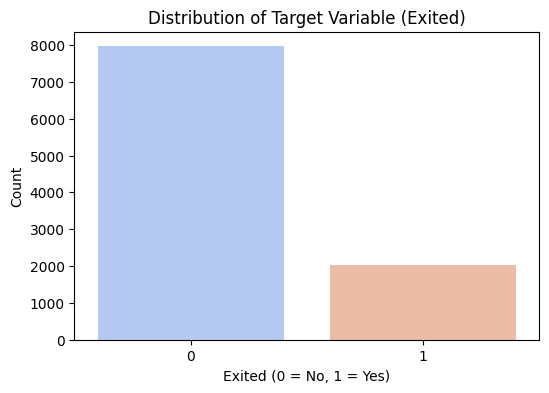

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

#  distribution of the targetvariable (churn/ no Churn)
plt.figure(figsize=(6,4))
sns.countplot(x=df['Exited'], palette="coolwarm")
plt.title('Distribution of Target Variable (Exited)')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## Interpretation of the Target Variable Distribution
The visualization shows the frequency distribution of the binary target variable "Exited," where:

0 = Customer did not leave the company (no churn)

1 = Customer did leave the company (churn)

Observations
The majority of customers (approx. 80%) did not cancel (Exited = 0).

Only about 20% of customers left the company (Exited = 1).

This corresponds to a class imbalance.

C:\Users\monaa\AppData\Local\Temp\ipykernel_11296\2397394930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Exited"], y=df["CreditScore"], palette="coolwarm")


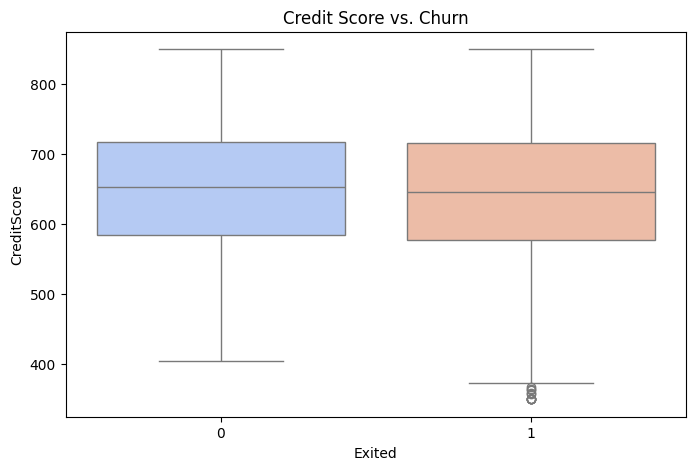

In [43]:
# Boxplot: Credit Score vs. Churn
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Exited"], y=df["CreditScore"], palette="coolwarm")
plt.title("Credit Score vs. Churn")
plt.show()

## Interpretation: Credit Score vs. Churn (Exited)
The boxplot visualizes the distribution of the credit score (CreditScore) depending on the target variable "Exited" (0 = Not terminated, 1 = Terminated).

Observations:
The median values ​​of the two groups are relatively close to each other (≈ 650–660).

The variance (interquartile range) and the extreme values ​​are similar – both groups have customers with low and very high scores.

In the Exited = 1 (terminated) class, there are more outliers (scores < 400).

Interpretation:
The credit score differs little between churners and non-churners.

There is no significant tendency for a higher or lower credit score to be directly related to termination.

The "CreditScore" feature does not appear to have strong discriminatory power for the target variable "Exited."

C:\Users\monaa\AppData\Local\Temp\ipykernel_11296\3742747445.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Exited"], y=df["Age"], palette="coolwarm")


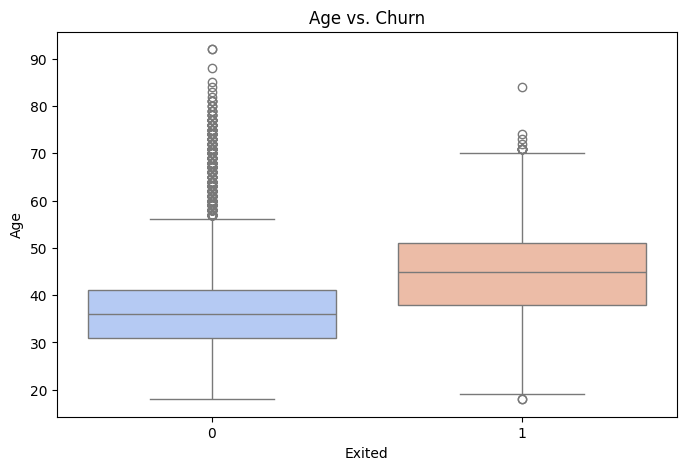

In [44]:
# 4️ Boxplot: Age vs. Churn
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Exited"], y=df["Age"], palette="coolwarm")
plt.title("Age vs. Churn")
plt.show()

## Boxplot: Age vs. Churn
This visualization shows the age distribution of two customer groups:

Exited = 0: Customers who have not canceled

Exited = 1: Customers who have canceled

Observations:
The median values ​​differ significantly:

Non-churners: Median age approximately 35–37 years

Churners: Median age approximately 45–47 years

Churners are, on average, older than non-churners.

The spread is greater among churners – in particular, older customers over 60 years of age are strongly represented when Exited = 1.

When Exited = 0, a very high density of young customers (under 40) can be seen.

There are some outliers in both groups (especially many very old non-churners).

Interpretation:
Age is a significant predictor of churn: The older a customer, the higher the likelihood of them canceling.

Possible explanations:

Older customers have different service requirements.

Lower digital affinity or stronger motivation to switch.

Possible differences in product usage behavior.

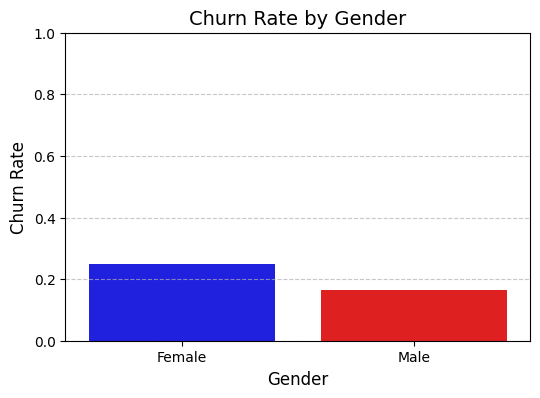

In [45]:
# Compute churn rate per gender
gender_churn = df.groupby("Gender")["Exited"].mean()

# Rename index for better readability
gender_churn.index = ["Female", "Male"]

# Plot with corrected syntax
plt.figure(figsize=(6,4))
sns.barplot(x=gender_churn.index, y=gender_churn.values, hue=gender_churn.index, palette=["blue", "red"], legend=False)

# Labels and title
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Churn Rate", fontsize=12)
plt.title("Churn Rate by Gender", fontsize=14)
plt.ylim(0, 1)  # Churn rate is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Interpretation of the output Churn Rate by Gender
- Female customers  have a higher churn rate compared to male customers
- The churn rate for females is slightly above 0.25 (25%), meaning around 25% of female customers left the bank
- The churn rate for males is lower, around 0.17-0.20 (17-20%), meaning fewer male customers left the bank compared to females

## Random Forest

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators shows the numbers of trees that are used 
model.fit(X_train, y_train) #train the model 

RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test) # to make predictions based on the test-dataset

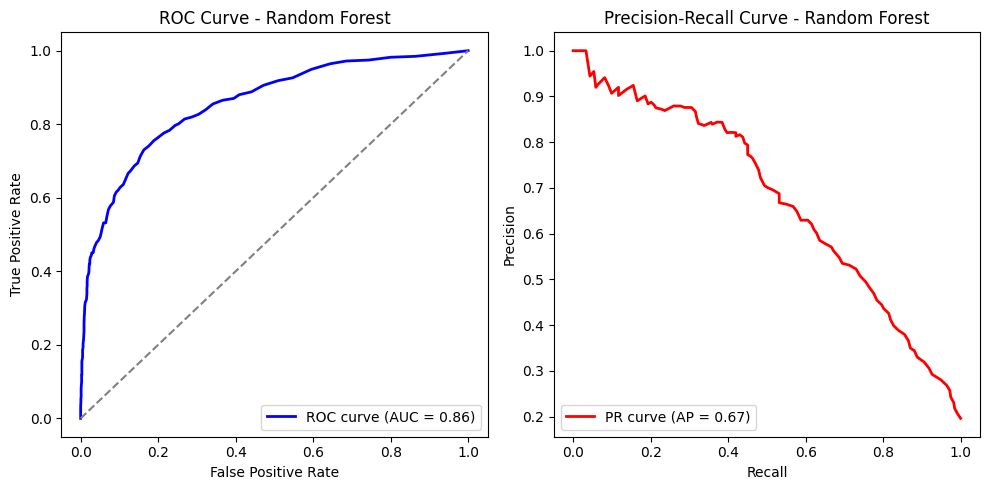

In [18]:
# Import necessary metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (1)
y_probs_rf = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs_rf)
average_precision = average_precision_score(y_test, y_probs_rf)

# Plot ROC curve
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='red', lw=2, label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [19]:
#create a confusion matrix, show the classification report and the accuracy

conf_matrix = confusion_matrix(y_test, y_pred) # table that is used to evaluate the performance of the model 
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(conf_matrix)
print(class_report)
print(accuracy)

[[1551   56]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

0.8665


Random Forest Accuracy: 0.867


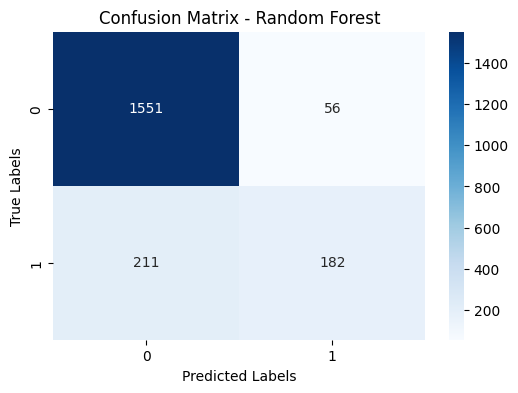

In [46]:
# Import necessary packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Feature scaling (fit only on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate with confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

#Print accuracy
acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc:.3f}")

#Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

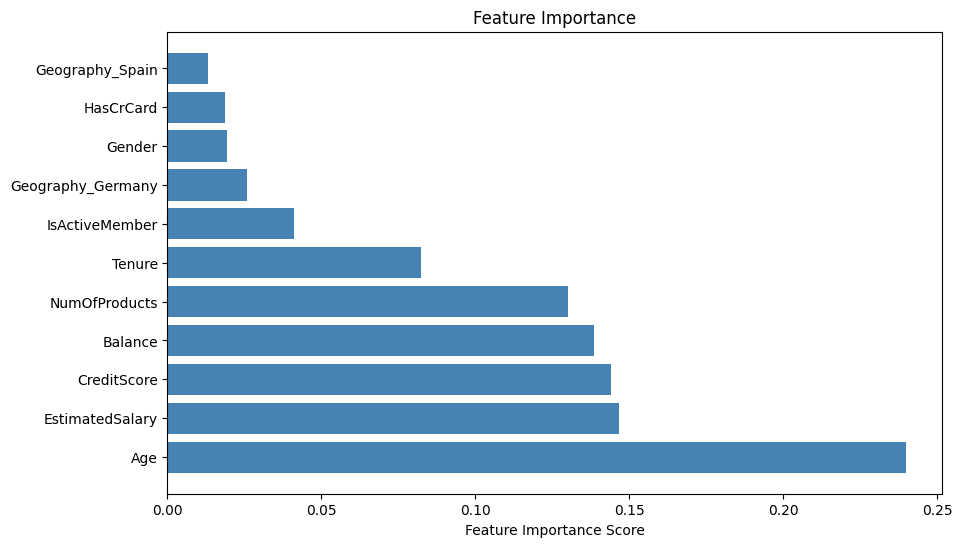

In [21]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1] #sort the features
sorted_names = [features[i] for i in indices] 

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(sorted_names, importances[indices], color="steelblue")  # Features as Y-Axis label 
plt.xlabel("Feature Importance Score")  # X-axis label 
plt.show() 

In [22]:
np.random.seed(2024)

# Define and train the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=710, min_samples_split=16, min_samples_leaf=7, max_depth=3)
rfc.fit(X_train, y_train)

# Evaluate the model
score = rfc.score(X_test, y_test)
print(f"Model Accuracy: {score:.4f}")

# Extract feature importances
feature_importances = rfc.feature_importances_

# Ensure X_train is a DataFrame with column names
feature_names = df.drop(columns=["Exited"]).columns.tolist()  # Extract correct feature names before splitting

# Zip feature names with importance values
importances = zip(feature_names, feature_importances)

# Sort features by importance in descending order
sorted_importances = sorted(importances, key=lambda x: x[1], reverse=True)

# Print sorted feature importances
for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.4f}")

Model Accuracy: 0.8340
Surname: 0.4024
Age: 0.3288
Balance: 0.1008
HasCrCard: 0.0877
Gender: 0.0428
CustomerId: 0.0189
RowNumber: 0.0118
NumOfProducts: 0.0033
CreditScore: 0.0017
IsActiveMember: 0.0015
Tenure: 0.0003


In [23]:
# dictionary to store accuracy results for different values of n_estimators
results = {}

# testing different numbers of trees in the Random Forest model
for i in range(10, 500, 50):  # Testing from 10 to 500 trees with a step of 50
    model = RandomForestClassifier(n_estimators=i, random_state=42)
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set
    results[i] = accuracy_score(y_test, y_pred)  # Store accuracy

# show all results
print(results)

# find the best number of trees based on accuracy
best_n_estimators = max(results, key=results.get)
best_accuracy = max(results.values())

print(f"Best accuracy: {best_accuracy:.2f} with n_estimators = {best_n_estimators}")

{10: 0.854, 60: 0.865, 110: 0.8635, 160: 0.865, 210: 0.8665, 260: 0.868, 310: 0.867, 360: 0.865, 410: 0.864, 460: 0.865}
Best accuracy: 0.87 with n_estimators = 260


In [24]:
import pickle

# Train and save model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
pickle.dump(model, open("random_forest_model.pkl", "wb"))

# Load the model later
loaded_model = pickle.load(open("random_forest_model.pkl", "rb"))
accuracy = loaded_model.score(X_test, y_test)

print(f"Loaded Model Accuracy: {accuracy:.2f}")

Loaded Model Accuracy: 0.87


## Logisitic Regression 

In [25]:
from sklearn.linear_model import LogisticRegression

# build and train the logisitic regression model 
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

#make predictions
y_pred_log_reg = log_reg.predict(X_test)

#evaluate the model 
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(conf_matrix_log_reg)
print(class_report_log_reg)
print(accuracy_log_reg)

[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

0.811


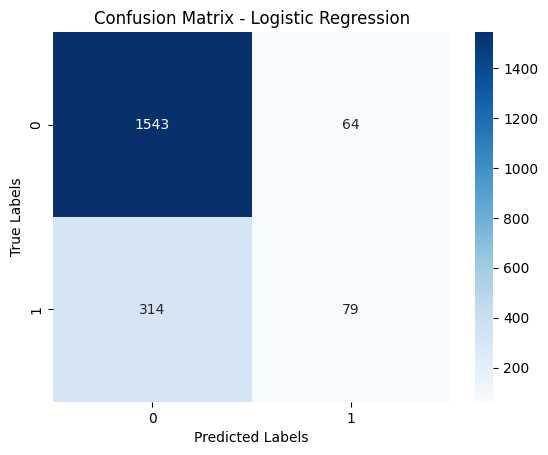

In [26]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix heatmap for Logistic Regression
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues", ax=ax)

# Show the plot
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

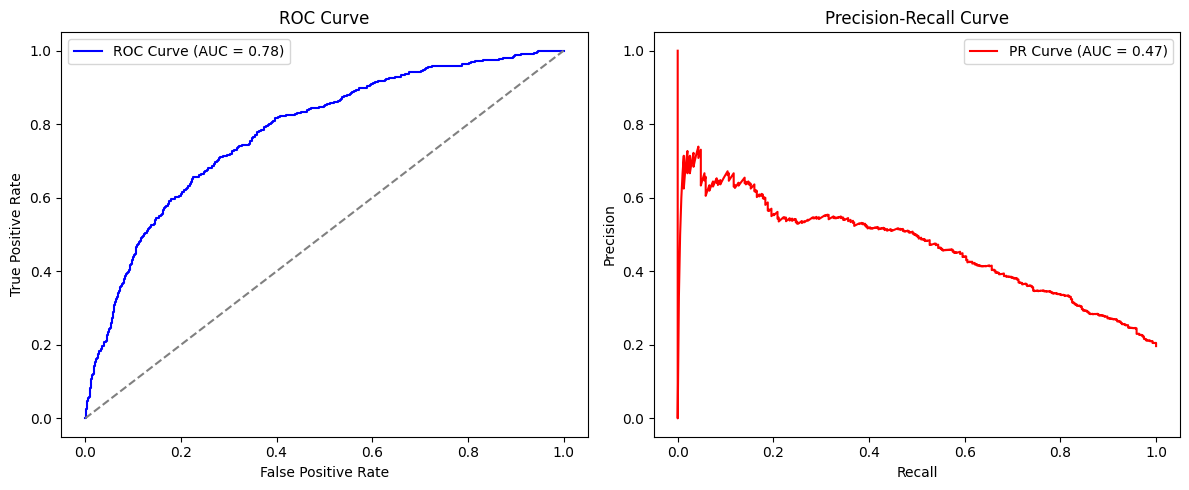

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Get predicted probabilities for the positive class (1)
y_probs_log_reg = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs_log_reg)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs_log_reg)
pr_auc = average_precision_score(y_test, y_probs_log_reg)

# Create plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC Curve
axes[0].plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
axes[0].plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier line
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve")
axes[0].legend()

# Plot Precision-Recall Curve
axes[1].plot(recall, precision, color="red", label=f"PR Curve (AUC = {pr_auc:.2f})")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_title("Precision-Recall Curve")
axes[1].legend()

# Show plots
plt.tight_layout()
plt.show()

## KNN-modell 

In [28]:
# Import K-Nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Build and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Set number of neighbors (k=5)
knn_model.fit(X_train, y_train)  # Train the model on the training data

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print results
print("Confusion Matrix:\n", conf_matrix_knn)
print("\nClassification Report:\n", class_report_knn)
print("\nAccuracy Score:", accuracy_knn)

Confusion Matrix:
 [[1514   93]
 [ 247  146]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000


Accuracy Score: 0.83


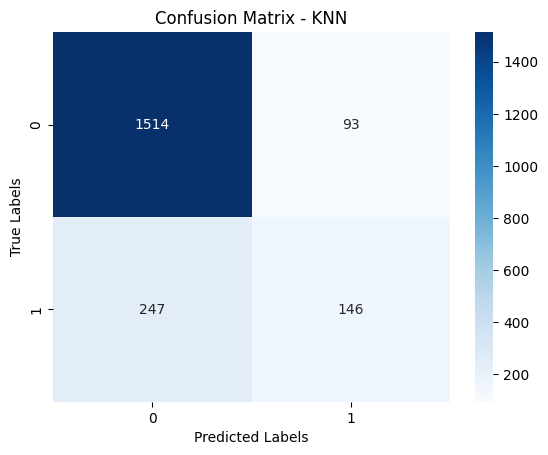

In [29]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", ax=ax)

# Add titles and labels
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()

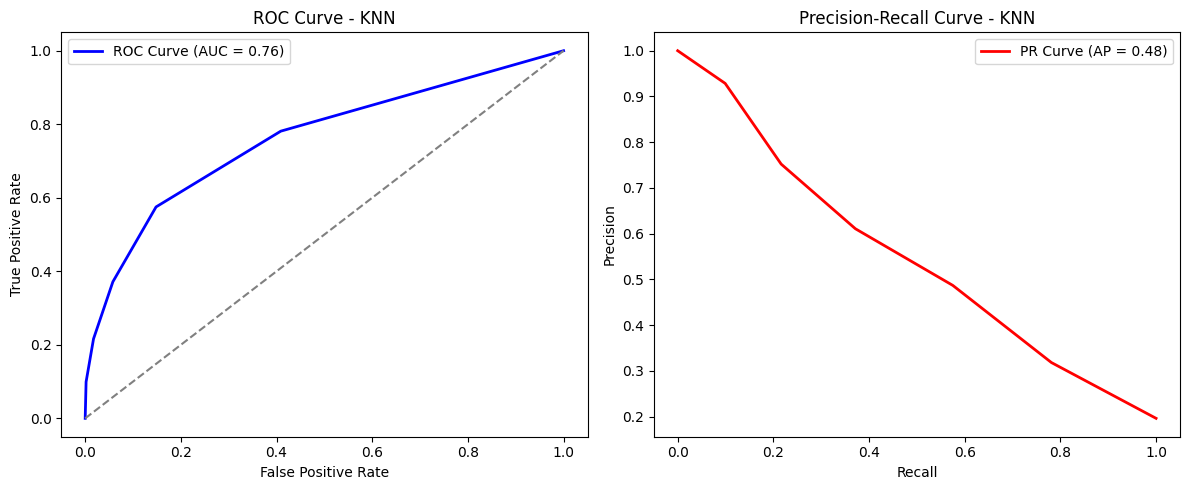

In [30]:
# Get predicted probabilities for the positive class (1)
y_probs_knn = knn_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Compute Precision-Recall curve and AUC
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_probs_knn)
pr_auc_knn = average_precision_score(y_test, y_probs_knn)

# Plot ROC Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr_knn, tpr_knn, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc_knn:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_knn, precision_knn, color="red", lw=2, label=f"PR Curve (AP = {pr_auc_knn:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - KNN")
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
#modeltraining
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate models
classifier1 = LogisticRegression(max_iter=1000, solver='saga', random_state=42)
best_rf = RandomForestClassifier(n_estimators=100, random_state=42)
best_knn = KNeighborsClassifier(n_neighbors=5)

# Fit models (make sure X_train_scaled and y_train are already defined)
classifier1.fit(X_train_scaled, y_train)
best_rf.fit(X_train_scaled, y_train)
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### ROC Curve Comparison

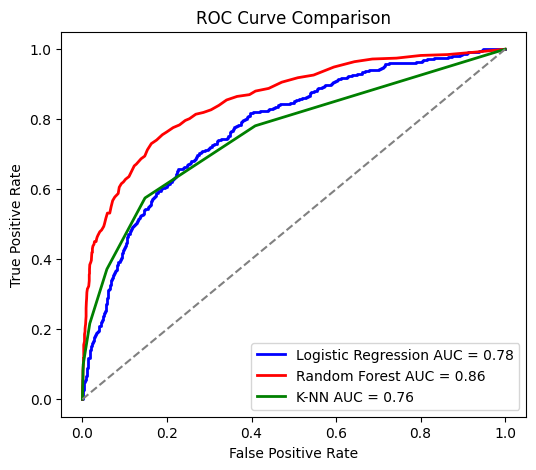

In [50]:
# from sklearn.metrics import roc_curve, auc

 # Get predicted probabilities for all models
y_prob_lr = classifier1.predict_proba(X_test_scaled)[:,1]  # Logistic Regression
y_prob_rf = best_rf.predict_proba(X_test_scaled)[:,1]      # Optimized Random Forest
y_prob_knn = best_knn.predict_proba(X_test_scaled)[:,1]    # Optimized K-NN

 # Compute ROC curve and AUC for all models
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

 # Plot ROC curves
plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression AUC = {roc_auc_lr:.2f}')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest AUC = {roc_auc_rf:.2f}')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'K-NN AUC = {roc_auc_knn:.2f}') 
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

## Interpretation of the ROC Curve Comparison
The ROC curve shows that Random Forest significantly outperforms Logistic Regression and KNN, achieving an AUC of 0.86. This indicates strong discriminatory power. Logistic Regression remains interpretable, but at the cost of accuracy (AUC = 0.78). KNN performs the weakest, likely due to its sensitivity to feature scaling and dimensionality.

### More on Implementing and comparing models
## Basic models
- Logistic Regression
- K-Nearest Neighbours Classifier
- Random Forest Classifier
Machine learning is an iterative practice. These algorithms are tools in your toolbox. Knowing each of these algorithms inside and out is not essential, but you still have to have a good intuition about their suitability, strengths and downsides. Reading about the algorithms and experimenting with them is crucial in building an intuition.

Start by training them on the data as it is and asess their performance. At this stage in the class, we will use the test set for comparing these models

Cross validation
Until now we evaluated different models on the test set to compare them and choose the best model. This is, as already mentioned, not good, since the choice will be then tailored to the specific test set Better Evaluation Using Cross-Validation when choosing between models and hyperparameters

split the training set into a smaller training set and a validation set
train your models against the smaller training set and evaluate them against the validation set
the test set should be just used at the end, for estimating the generalization error. If we choose the hyperparameters based on the performance the model has on this one test set, we will end up fitting the model to this particular test set and the generalization error will actually be higher than the estimated one.
A common method: k-fold cross validation

Q: Explain K-fold cross-validation
A: K-fold cross-validation is used to evaluate ml-models by dividing the given dataset into multiple folds, this helps to reduce the bias and the variance in the model performance estimation. 
- The dataset is randomly split into K-equal-sized folds. The model is trained K times and each time the K-1 folds are used for training while the remaining 1 fold is used for testing. Each of the folds are used as the test set exactly one time, to ensure that every datapoint is tested. The performance of the model is averaged across all K iterations to obtain a more relable estimate of it's accuracy.
- K-Fold-Cross-Validation reduces the risk of overfitting and also provides a more robust evalution of model performance compared to a single train-test split. Additionally every data point contributes to the training and the test set, which leads to a more generalizable model.

## Voting Classifier (Modell-Ensembling)

In [68]:
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_scaled, y_train)
y_pred_logreg = logreg_model.predict(X_test_scaled)

In [75]:
# Voting Classifier (Model Ensembling)
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Use the already trained models from earlier:
# classifier1 = Logistic Regression
# best_rf = Random Forest
# best_knn = K-Nearest Neighbors

voting_clf = VotingClassifier(
    estimators=[
        ('lr', classifier1),
        ('rf', best_rf),
        ('knn', best_knn)
    ],
    voting='soft'
)

# Train VotingClassifier using existing models
voting_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_voting = voting_clf.predict(X_test_scaled)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.8565


### Interpretation of the Voting Classifier (Model Ensembling)

The Voting Classifier combines the predictions of three models – Logistic Regression, Random Forest, and K-Nearest Neighbors – using soft voting. The predicted probabilities are averaged to make a final decision.

With an accuracy of 0.8565, the Voting Classifier achieves a performance similar to the best single model (Random Forest) and slightly outperforms both Logistic Regression and the KNN model.

This confirms that an ensemble approach such as the Voting Classifier is a robust and reliable method because it combines the strengths of different models. Especially for datasets with complex patterns, ensembling can lead to more stable results.

Conclusion: The Voting Classifier is a good choice for this problem and offers a strong combination of accuracy and stability.

## Comparison CVScore and Test Score 

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

# Scale the data (important for convergence in Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Update the Logistic Regression model with increased iterations and a different solver
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="saga"),  # Increased iterations
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Function to train models and evaluate performance
def fit_and_score(models, X_train, X_test, y_train, y_test):
    cvmodel_scores = {}
    test_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)  # Train the model
        test_scores[name] = model.score(X_test, y_test)  # Evaluate on test set

        # Compute cross-validation scores
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        cvmodel_scores[name] = np.mean(cv_scores)

    return test_scores, cvmodel_scores

# Use the scaled data
model_scores = fit_and_score(models, X_train_scaled, X_test_scaled, y_train, y_test)

# Print updated results
print("Test Set Accuracy Scores:", model_scores[0])
print("\nCross-Validation Scores:", model_scores[1])

Test Set Accuracy Scores: {'Logistic Regression': 0.811, 'KNN': 0.83, 'Random Forest': 0.866}

Cross-Validation Scores: {'Logistic Regression': np.float64(0.810375), 'KNN': np.float64(0.8251250000000001), 'Random Forest': np.float64(0.860125)}


### Interpretation of Test and Cross-Validation Results

The following results show the accuracy of the three models on the test dataset, as well as the average value from a 5-fold cross-validation:

Test Accuracy Scores:

- Logistic Regression: 0.811
-K-Nearest Neighbors (KNN): 0.830
-Random Forest: 0.866
-Cross-Validation Scores (Average):
-Logistic Regression: 0.810
-KNN: 0.825
-Random Forest: 0.860

Analysis:

All models show consistent performance between test and cross-validation results, indicating good generalizability.
Random Forest achieves the highest accuracy in both evaluations and therefore appears to be best suited for this prediction task.
KNN performs slightly better in the test set than in cross-validation, which could indicate slight overfitting.
Logistic regression delivers stable and comprehensible results, but is less suitable when pure accuracy is the goal.
This comparison helps to identify overfitting or underfitting early on and to select suitable models.

## Feature Engineering 

In [31]:
df = pd.read_csv(r"C:\Users\monaa\Desktop\ProjektAlisa\Bank_Churn_Data.csv") #path to read my file - raw string führt ohne zu Fehler 
import pandas as pd

# Binary feature for Balance (1 = Balance is zero, 0 = Balance is non-zero)
df['BalanceZero'] = (df['Balance'] == 0).astype(int)

# Age groups (buckets for different age ranges)
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 75, 85, 95], 
                        labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95'])

# Balance to Salary Ratio (measuring how much of the estimated salary is stored in balance)
df['BalanceToSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

# Interaction feature between NumOfProducts and IsActiveMember (measuring how active a customer is)
df['ProductUsage'] = df['NumOfProducts'] * df['IsActiveMember']

# Tenure grouping (categorizing customers based on their tenure)
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0, 2, 5, 7, 10], 
                           labels=['0-2', '3-5', '6-7', '8-10'])

# Display the first few rows to inspect the new features
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceZero,AgeGroup,BalanceToSalaryRatio,ProductUsage,TenureGroup
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,36-45,0.000000,1,0-2
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,36-45,0.744677,1,0-2
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,36-45,1.401375,0,8-10
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,36-45,0.000000,0,0-2
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,36-45,1.587055,1,0-2


In [32]:
# Initialize the label encoder for 'Gender'
label_encoder = LabelEncoder()

# Convert 'Gender' into numerical values: Male → 1, Female → 0
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# One-Hot Encoding for 'Geography' (drop_first=True avoids dummy variable trap)
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# One-Hot Encoding for categorical variables 'Age' and 'Tenur'
df = pd.get_dummies(df, columns=['Age', 'Tenure'], drop_first=True)

# Convert Tenure dummy variables to integer values (0/1 instead of False/True)
tenure_cols = [col for col in df.columns if 'Tenure_' in col]
df[tenure_cols] = df[tenure_cols].astype(int)



# Creating interaction features between 'Gender' and 'Geography'
# These features help capture any relationships between gender and location
df['Male_Germany'] = df['Gender'] * df['Geography_Germany']
df['Male_Spain'] = df['Gender'] * df['Geography_Spain']

# Display the first few rows to verify the new features
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Male_Germany,Male_Spain
0,1,15634602,Hargrave,619,0,0.00,1,1,1,101348.88,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,Hill,608,0,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,0,0,0
2,3,15619304,Onio,502,0,159660.80,3,1,0,113931.57,...,0,0,0,0,0,1,0,0,0,0
3,4,15701354,Boni,699,0,0.00,2,0,0,93826.63,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,Mitchell,850,0,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Dynamically add age and tenure dummies to the feature list
features = [
    'CreditScore', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 
    'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'BalanceZero', 
    'BalanceToSalaryRatio', 'ProductUsage', 'Male_Germany', 'Male_Spain'
] + [col for col in df.columns if 'AgeGroup_' in col or 'TenureGroup_' in col]

# Define features and target variable
X = df[features]
y = df['Exited']

In [ ]:
# Train three baseline models: Logistic Regression, Random Forest, and K-Nearest Neighbors (KNN)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

#Logistic Regression 
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_logreg = log_reg.predict(X_test_scaled)

print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

#Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

#K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print("\n--- K-Nearest Neighbors ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

#Cross-Validation Scores
cv_scores_log = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
cv_scores_knn = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)

print("\nCross-Validation Scores (mean accuracy):")
print("Logistic Regression:", cv_scores_log.mean())
print("Random Forest:", cv_scores_rf.mean())
print("KNN:", cv_scores_knn.mean())


--- Logistic Regression ---
Accuracy: 0.811
Confusion Matrix:
 [[1543   64]
 [ 314   79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


--- Random Forest ---
Accuracy: 0.8665
Confusion Matrix:
 [[1551   56]
 [ 211  182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000


--- K-Nearest Neighbors ---
Accuracy: 0.83
Confusion Matrix:
 [[1514   93]
 [ 247  146]]
Classification Report:
        

## Interpretation of the output
Random Forest delivers the highest accuracy for both test data and cross-validation.

Logistic Regression is somewhat weaker but easily interpretable.

KNN falls in between.